In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import sunspots
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
data = sunspots.load_pandas().data
sunspots_data = data['SUNACTIVITY'].values

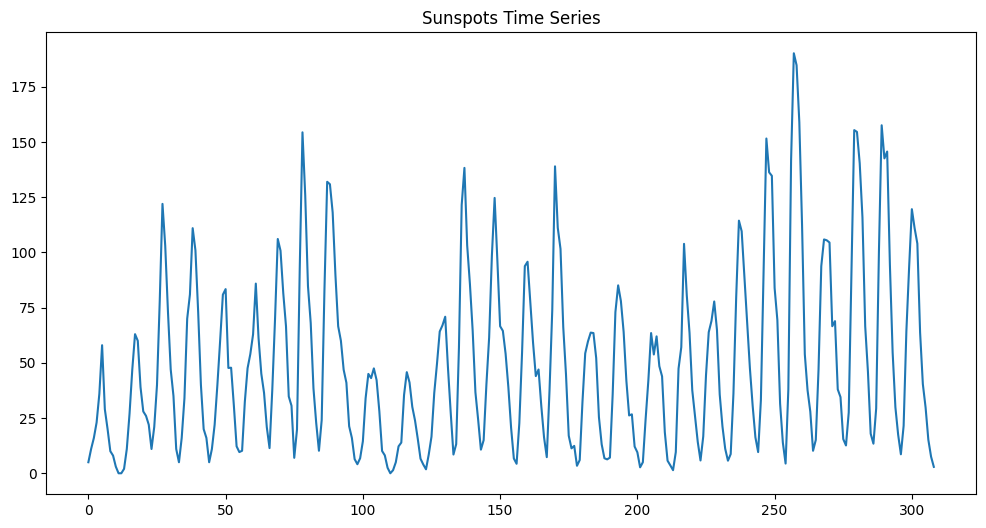

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(sunspots_data)
plt.title('Sunspots Time Series')
plt.show()

In [31]:
scaler = MinMaxScaler()
sunspots_data = scaler.fit_transform(sunspots_data.reshape(-1, 1))

In [32]:
train_size = int(len(sunspots_data) * 0.67)
train_data, test_data = sunspots_data[0:train_size], sunspots_data[train_size:]

In [33]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

In [34]:
seq_length = 12
epochs = 100
batch_size = 32

In [35]:
train_sequences = create_sequences(train_data, seq_length)

In [36]:
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [38]:
model.fit(train_sequences, train_data[seq_length:], epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
5/5 [==============================] - 2s 114ms/step - loss: 0.0682 - val_loss: 0.0416
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0410 - val_loss: 0.0308
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0344 - val_loss: 0.0362
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0353 - val_loss: 0.0331
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0323 - val_loss: 0.0298
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0308 - val_loss: 0.0292
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0308 - val_loss: 0.0286
Epoch 8/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0301 - val_loss: 0.0280
Epoch 9/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0294 - val_loss: 0.0277
Epoch 10/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0287 - val_loss: 0.0271
Epoch 11/100
5/5 [

In [39]:
test_sequences = create_sequences(test_data, seq_length)

In [40]:
predicted_values = model.predict(test_sequences)

3/3 [==============================] - 0s 5ms/step


In [41]:
predicted_values = scaler.inverse_transform(predicted_values)

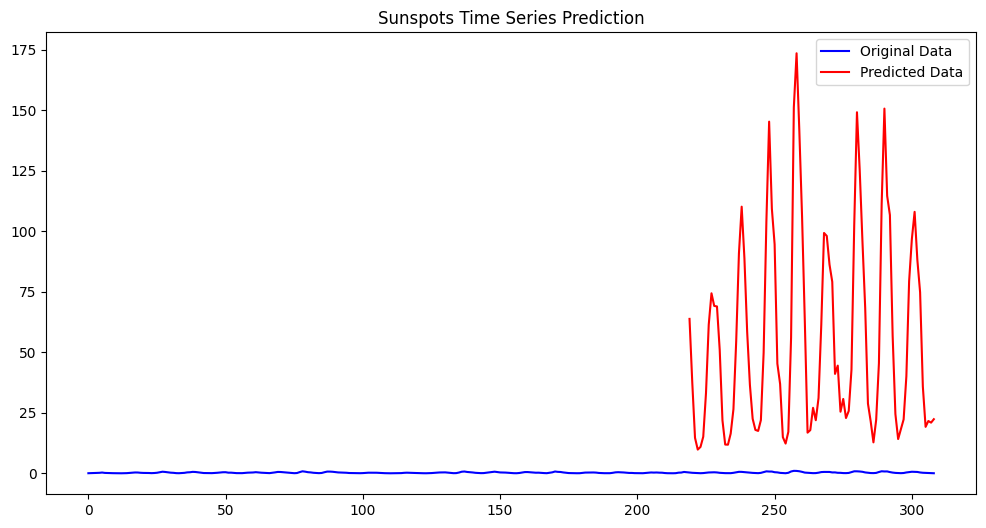

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(len(sunspots_data)), sunspots_data, label='Original Data', color='blue')
ax.plot(np.arange(train_size + seq_length, train_size + seq_length + len(predicted_values)), predicted_values, label='Predicted Data', color='red')
ax.set_title('Sunspots Time Series Prediction')
ax.legend()
plt.show()